# Lab   -  HR Diagram

In this lab you will practice making an Hertzprung-Russell (HR) diagram using the properties of real stars. Make sure to read the instructions carefully and answer any written questions within the notebook. There are also a few optional bonus steps, if you have extra time or would like a challenge.

Astronomy skills:
- parallax
- apparent & absolute magnitudes
- HR diagram


Python skills:
- plot formatting
- multipanel plots
- conditional statements
- selecting subsets of arrays






## Set up
Run the cell below to read in the packages you'll need for this lab.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1 - read in the data

The file for today's lab is called "Lab_data.csv".  It constains data for nearby stars from the Yale General Catalogue of Trigonometric Parallaxes.

If using Colab, upload this file to the "files" folder on the left sidebar. Then, open the file in Colab or on your computer so you can see what data you'll be working with.

**Question:** What data are given in this file? Write a comment below to describe each quantity and its units.

In [9]:
# answer here
# star ID, V mag in mag, B-V color in mag, parallax in mas, parallax error in mas

Now read in the data file so you can use it! Look back on Lab01 if you need an reminder for how to read in data.

In [10]:
# code here
star, V, color, par_mas, epar_mas = np.loadtxt('Lab05_data.csv', delimiter=',', skiprows=1, unpack=True)


## Step 2 - absolute magnitude

The usual HR diagram is a plot of luminosity versus temperature, but we will make a modified version called a "color-magnitude diagram" (CMD). A color-magnitude diagram is a plot of absolute V magnitude versus B-V color. Therefore, we need to calculate the absolute magnitude of each star.

Write some code below to do this, and make sure to add comments to explain what you're doing!  (Hint, you can use log base 10 with `np.log10()`. For example:
 ```
 a = np.log10(48264.)
 # or
 x = [100, 200, 300]
 y = np.log10(x)
 ```

In [11]:
# code here

# convert parallax from mas to arcsec
par = par_mas / 1000
epar = epar_mas / 1000


# calculate the distances
d = 1 / par    # pc


# distance modulus equation
# m - M = 5 log d - 5
# M = m - 5 logd + 5
M = V - 5*np.log10(d) + 5


## Step 3 - color-magnitude diagram
First, let's make a CMD using the entire dataset.
Your plot should have B-V color on the x-axis, and absolute V magnitude on the y-axis.

Things to remember in your plot:
- Label your axes
- Don't use really big point sizes! You are going to plot over 6000 stars, so use small dots or it'll all run together. You can do this with the `ms` (marker size) setting within a plot command:
`plt.plot(x, y, ms = 2)`
- You're an astronomer, which means your HR diagram should have bright stars AT THE TOP and blue stars TO THE LEFT.
- Set your own axis limits. In this case, it's better to have a few points outside the plot so we can see the majority of stars really well.



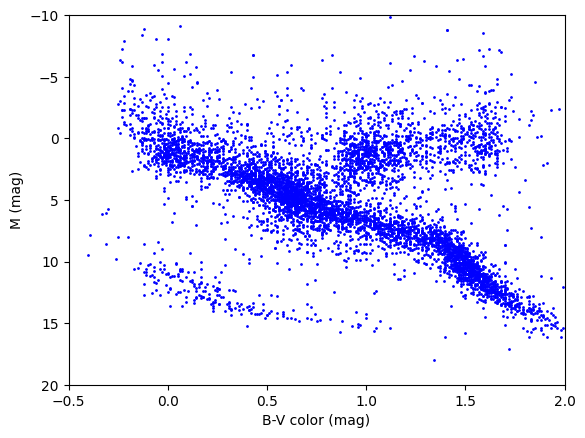

In [12]:
# code here

plt.plot(color, M, 'bo', ms=1)
plt.xlabel('B-V color (mag)')
plt.ylabel('M (mag)')
plt.xlim(-0.5, 2)
plt.ylim(20, -10)
plt.show()


Now it looks like a real HR diagram! You should be able to make out the main sequence, giant branch, and white dwarf regions on your plot.  

Compare your plot with a classmate to make sure you're on the right track.

Next, let's spruce up the plot a little!
1. Copy the code from the cell above into the empty cell below so you can make an updated version of the plot.

2. Label the various types of stars (main sequence stars, red giants, white dwarfs, etc) on your plot by adding text labels. To add text, use `plt.text(x position, y position, text string)` command. Run the cell below to see an example.


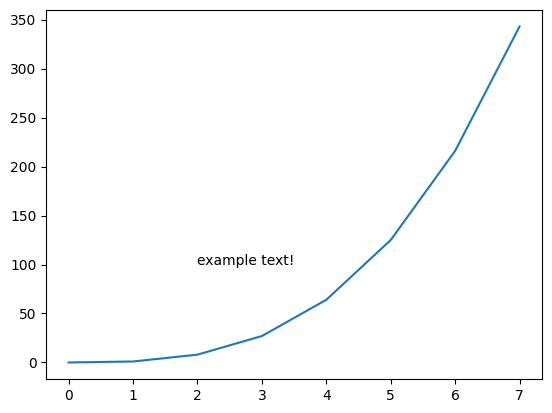

In [13]:
# make data arrays
x = np.arange(0,8)
y = x**3

# make plot
plt.plot(x, y)

# add text starting at position (2,100)
plt.text(2, 100, 'example text!')

plt.show()

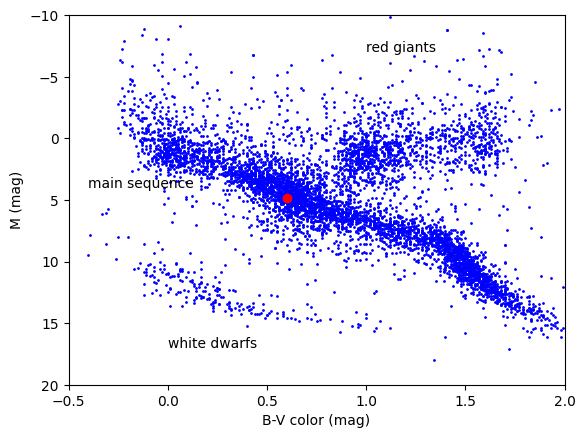

In [14]:
# make updated plot here

plt.plot(color, M, 'bo', ms=1)
plt.xlabel('B-V color (mag)')
plt.ylabel('M (mag)')
plt.xlim(-0.5, 2)
plt.ylim(20, -10)
plt.text(0, 17, 'white dwarfs')
plt.text(-0.4, 4, 'main sequence')
plt.text(1, -7, 'red giants')
plt.plot([0.6], [4.83], 'ro')
plt.show()

## Step 4 - selecting subsamples

Astronomers often start with a large data set but only want to keep certain stars, so we need a way to select only the stars we want and cut down our sample.  One way to do this is with the `np.where()` function. If we give this function a condition, it will find all the indices in our array where this condition is true. Here are common condition statements in python:
- Equals: `a == b`
- Not Equals: `a != b`
- Less than: `a < b`
- Less than or equal to: `a <= b`
- Greater than: `a > b`
- Greater than or equal to: `a >= b`


In the example below, we want to find the locations where the array `names` is equal to "Gemini". It will output these indicies into the array `good`. Run this cell to see how it works:



In [15]:
# array with telescope names
names = np.array(['Gemini', 'Keck', 'WIYN', 'SALT', 'CTIO', 'Gemini'])
print(names)

# find the indices where "names" is equal to "Gemini"
# save these indices in the array "good"
good = np.where(names == "Gemini")
print(good)


# we could then use this index array for other functions
#  for example, to print only these values
print(names[good])

['Gemini' 'Keck' 'WIYN' 'SALT' 'CTIO' 'Gemini']
(array([0, 5]),)
['Gemini' 'Gemini']


It correctly tells us that the 1st and last (6th) position in the array have values of "Gemini.

Try it for yourself! Add to the code below to print the values of `x` that are larger than 10.

In [16]:
# make x array
x = np.array([0, 5, 10, 15, 20])

# add code here
good = np.where(x > 10)
print(x[good])


[15 20]


## Step 5 - plotting subsamples

Now, you're ready to use this function to select only stars with certain properties. Write some code below to make two color-magnitude diagrams:
1. only using stars with parallax uncertainties *smaller* than 50 millarcseconds
2. only using stars with parallax uncertainties *equal to or larger* than 50 millarcseconds


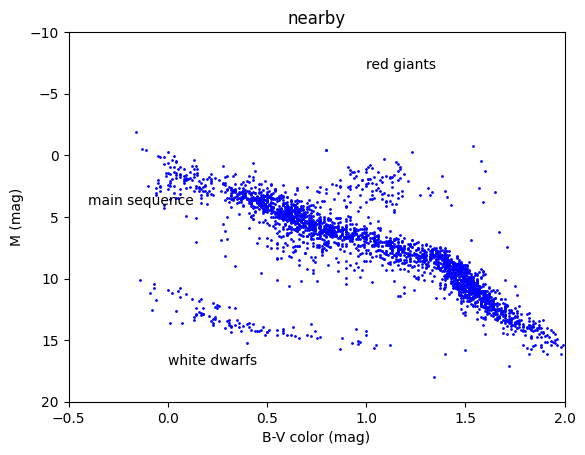

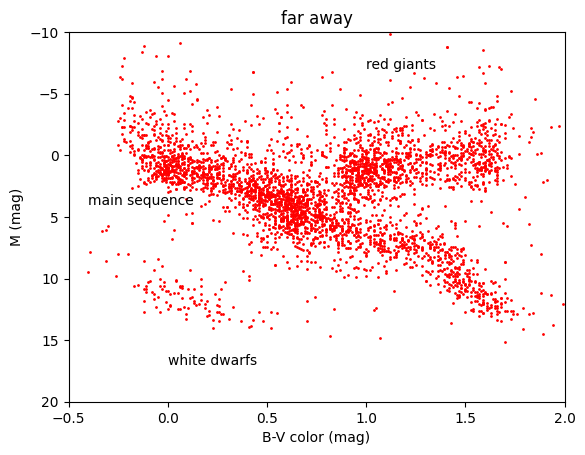

In [17]:
# write code here

# distance < 30
good = np.where(d < 30)[0]
plt.plot(color[good], M[good], 'bo', ms=1)
plt.xlabel('B-V color (mag)')
plt.ylabel('M (mag)')
plt.xlim(-0.5, 2)
plt.ylim(20, -10)
plt.text(0, 17, 'white dwarfs')
plt.text(-0.4, 4, 'main sequence')
plt.text(1, -7, 'red giants')
plt.title('nearby')
plt.show()

# distance >= 30
good = np.where(d >= 30)[0]
plt.plot(color[good], M[good], 'ro', ms=1)
plt.xlabel('B-V color (mag)')
plt.ylabel('M (mag)')
plt.xlim(-0.5, 2)
plt.ylim(20, -10)
plt.text(0, 17, 'white dwarfs')
plt.text(-0.4, 4, 'main sequence')
plt.text(1, -7, 'red giants')
plt.title('far away')
plt.show()


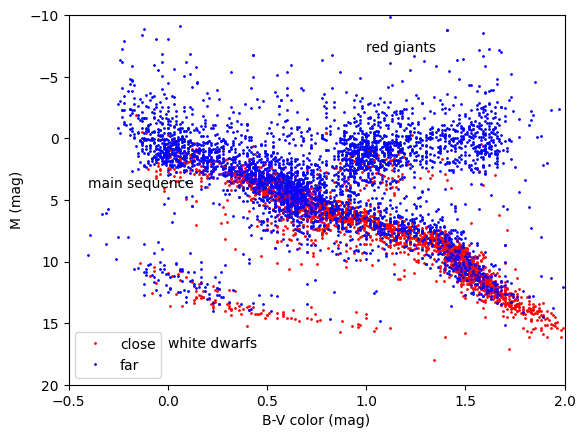

In [23]:
# distance < 30
good = np.where(d < 30)[0]
plt.plot(color[good], M[good], 'ro', ms=1, label='close')

good = np.where(d >= 30)[0]
plt.plot(color[good], M[good], 'bo', ms=1, label='far')

plt.xlabel('B-V color (mag)')
plt.ylabel('M (mag)')
plt.xlim(-0.5, 2)
plt.ylim(20, -10)
plt.text(0, 17, 'white dwarfs')
plt.text(-0.4, 4, 'main sequence')
plt.text(1, -7, 'red giants')

plt.legend()

plt.show()

## Bonus [optional]

Make sure to answer the questions below first! But if you have time left over afterwards, here are some more challenges:

* Instead of splitting the stars into two sets using the uncertainty itself, try splitting them by the *fractional uncertainty*. Make one plot with stars that have a fractional parallax uncertainty less than 30%, and the second plot with uncertainty greater or equal to 30%.

* Try making these plots as two side-by-side panels in the same plot. An easy way to do this is with the `plt.subplot()` [function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html). Then, give each plot an informative title and different plot colors, so you can easily tell them apart.

* Add a new data point to indicate where the Sun would be on these plots. The Sun has $M_V = 4.83$ mag and $M_B = 5.48$ mag. Make this point a different color so it stands out.


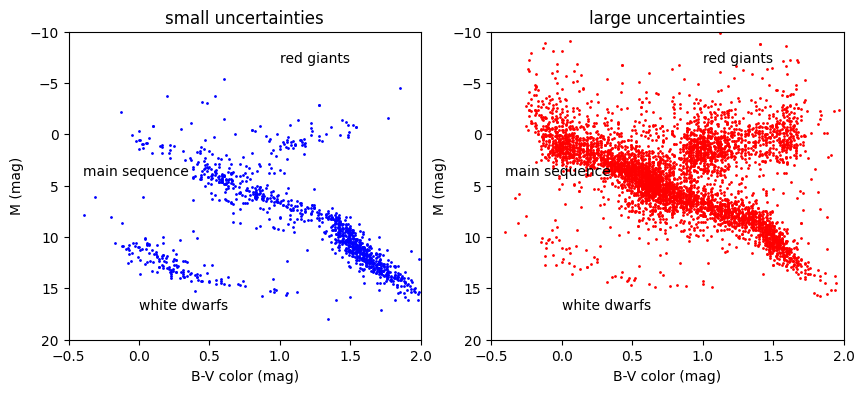

In [18]:
# optional code here

plt.figure(figsize=(10,4))

# UNCERTAINTY < 50
good = np.where(epar_mas < 50)[0]
plt.subplot(121)
plt.plot(color[good], M[good], 'bo', ms=1)
plt.xlabel('B-V color (mag)')
plt.ylabel('M (mag)')
plt.xlim(-0.5, 2)
plt.ylim(20, -10)
plt.text(0, 17, 'white dwarfs')
plt.text(-0.4, 4, 'main sequence')
plt.text(1, -7, 'red giants')
plt.title('small uncertainties')

# UNCERTAINTY >= 50
good = np.where(epar_mas >= 50)[0]
plt.subplot(122)
plt.plot(color[good], M[good], 'ro', ms=1)
plt.xlabel('B-V color (mag)')
plt.ylabel('M (mag)')
plt.xlim(-0.5, 2)
plt.ylim(20, -10)
plt.text(0, 17, 'white dwarfs')
plt.text(-0.4, 4, 'main sequence')
plt.text(1, -7, 'red giants')
plt.title('large uncertainties')

plt.show()

---
## Questions
1. What differences do you see between the two plots? Look at the kinds of stars that show up, the numbers of stars that show up in different regions, and the properties of the main sequence stars.

2. Why do the different parallax uncertainty limits lead to these differences? Explain how the precision of the parallax measurements might affect the plot.


In [19]:
# write your answers here
#
#

---
## Final steps

**Turning in your lab**

If using Colab -- Click File --> Save a copy to Drive. Save the file to your shared Lab folder.


If using Jupyter --
Save this notebook to your computer, then upload it to your shared Lab folder in Google Drive.